In [1]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
#TextBlob
from textblob import TextBlob
import tools.sentiment_analysis as sa

In [2]:
!ls

Connecting To Reddit API.ipynb my_api.py
Mongo with my_API.ipynb        negative_sentiment.jpg
README.md                      positive_sentiment.jpg
Sentiment Analysis.ipynb       reddit_wsb 11.30.57 AM.csv
archivos.txt                   ticker_freq.jpg
config                         tools
data                           wsb.csv


In [3]:
wsb = pd.read_csv('wsb.csv')

In [4]:
wsb

,Unnamed: 0,created,id,title,upvotes,num_comments,comment_body,tickers,datetime
0,0,1.618604e+09,msblc3,GME YOLO update — Apr 16 2021 — final update,143300,13450,"THIS GUY! Not only exercised, but got an add...",GME,2021-04-16 20:20:13
1,1,1.619246e+09,mxe7dz,Why am I still holding? I'm an Apeman.,85905,2380,Is this made from scratch? Not editing already...,NaN,2021-04-24 06:27:56
2,2,1.618245e+09,mphitx,i did something retarded,79230,2909,As long as it isn’t Robinhoods CEO on your for...,NaN,2021-04-12 16:30:16
3,3,1.618681e+09,msv8n1,Tbh I only trust retards.,78865,1229,Why the fuck is this a video and not a picture?,NaN,2021-04-17 17:41:10
4,4,1.618618e+09,msfw2x,Cheers everyone!,77902,2248,The official GameStop account responded to thi...,NaN,2021-04-17 00:05:25
...,...,...,...,...,...,...,...,...,...
995,995,1.618950e+09,muzfuv,Autopilot was off for Texas crash. Playing ear...,127,57,Jesus that theta,NaN,2021-04-20 20:21:34
996,996,1.618497e+09,mrfyuh,AMC Discussion,122,96,You diversified? 👀,AMC,2021-04-15 14:35:35
997,997,1.617923e+09,mn3v2q,"$RKT - $120k stocks, come on...",123,47,Sell calls and buy more shares,RKT,2021-04-08 23:01:27
998,998,1.617739e+09,mlk8re,"Name of the game, move the money out of your c...",122,35,How do I move money from Wall Street’s pocket ...,NaN,2021-04-06 19:56:25


In [5]:
#We apply the tokenize function to our titles.
wsb['token_title'] = wsb['title'].apply(sa.tokenize)
wsb['token_comment'] = wsb['comment_body'].apply(sa.tokenize)
wsb.head()

,Unnamed: 0,created,id,title,upvotes,num_comments,comment_body,tickers,datetime,token_title,token_comment
0,0,1.618604e+09,msblc3,GME YOLO update — Apr 16 2021 — final update,143300,13450,"THIS GUY! Not only exercised, but got an add...",GME,2021-04-16 20:20:13,"[GME, YOLO, update, Apr, 16, 2021, final, update]","[THIS, GUY, Not, only, exercised, but, got, an..."
1,1,1.619246e+09,mxe7dz,Why am I still holding? I'm an Apeman.,85905,2380,Is this made from scratch? Not editing already...,NaN,2021-04-24 06:27:56,"[Why, am, I, still, holding, I, m, an, Apeman]","[Is, this, made, from, scratch, Not, editing, ..."
2,2,1.618245e+09,mphitx,i did something retarded,79230,2909,As long as it isn’t Robinhoods CEO on your for...,NaN,2021-04-12 16:30:16,"[i, did, something, retarded]","[As, long, as, it, isn, t, Robinhoods, CEO, on..."
3,3,1.618681e+09,msv8n1,Tbh I only trust retards.,78865,1229,Why the fuck is this a video and not a picture?,NaN,2021-04-17 17:41:10,"[Tbh, I, only, trust, retards]","[Why, the, fuck, is, this, a, video, and, not,..."
4,4,1.618618e+09,msfw2x,Cheers everyone!,77902,2248,The official GameStop account responded to thi...,NaN,2021-04-17 00:05:25,"[Cheers, everyone]","[The, official, GameStop, account, responded, ..."


In [6]:
#We unlist our tokenized titles and comments.
wsb['token_title'] = wsb['token_title'].apply(lambda x: " ".join(x))
wsb['token_comment'] = wsb['token_comment'].apply(lambda x: " ".join(x))
wsb.head()

,Unnamed: 0,created,id,title,upvotes,num_comments,comment_body,tickers,datetime,token_title,token_comment
0,0,1.618604e+09,msblc3,GME YOLO update — Apr 16 2021 — final update,143300,13450,"THIS GUY! Not only exercised, but got an add...",GME,2021-04-16 20:20:13,GME YOLO update Apr 16 2021 final update,THIS GUY Not only exercised but got an additio...
1,1,1.619246e+09,mxe7dz,Why am I still holding? I'm an Apeman.,85905,2380,Is this made from scratch? Not editing already...,NaN,2021-04-24 06:27:56,Why am I still holding I m an Apeman,Is this made from scratch Not editing already ...
2,2,1.618245e+09,mphitx,i did something retarded,79230,2909,As long as it isn’t Robinhoods CEO on your for...,NaN,2021-04-12 16:30:16,i did something retarded,As long as it isn t Robinhoods CEO on your for...
3,3,1.618681e+09,msv8n1,Tbh I only trust retards.,78865,1229,Why the fuck is this a video and not a picture?,NaN,2021-04-17 17:41:10,Tbh I only trust retards,Why the fuck is this a video and not a picture
4,4,1.618618e+09,msfw2x,Cheers everyone!,77902,2248,The official GameStop account responded to thi...,NaN,2021-04-17 00:05:25,Cheers everyone,The official GameStop account responded to thi...


In [7]:
#We apply the sentiment analysis function to our tokenized titles and comments.
wsb['title_sentiment'] = wsb.token_title.apply(sa.sentimentAnalysis)
wsb['topcomment_sentiment'] = wsb.token_comment.apply(sa.sentimentAnalysis)

In [8]:
#We drop the columns we don't need anymore
wsb.drop(columns = ['title', 'comment_body'], inplace = True)

In [9]:
#We pass the data to json format to insert into the database
wsb.to_json("./data/r_WSB.json", orient="records")

In [10]:
# !mongoimport --db Reddit --collection WSB_posts --jsonArray r_WSB
#we pass the data to mongo

In [11]:
#we group our data by tickers and get the mean title sentiment for each of them.
tickers_sentiment = wsb.groupby(['tickers'])['title_sentiment'].mean().sort_values(ascending = False)

In [12]:
#We create a df of mean ticker sentiment, and split it into positive and negative sentiment

tickers_sentiment = pd.DataFrame(tickers_sentiment)
positive_sentiment = tickers_sentiment.loc[tickers_sentiment['title_sentiment'] > 0]
negative_sentiment = tickers_sentiment.loc[tickers_sentiment['title_sentiment'] < 0]

In [13]:
#Plot title sentiment as a whole
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(40, 40), dpi=300)
sns.barplot(x = tickers_sentiment.index,  y = tickers_sentiment['title_sentiment'] )
plt.xticks(rotation=90)
plt.show()

In [30]:
#Plot possitvie title sentiment
plt.figure(figsize=(40, 40), dpi=400)
sns.barplot(x = positive_sentiment.index,  y = positive_sentiment['title_sentiment'] )
plt.xticks(rotation=90)
plt.savefig('./pics/positive_sentiment.jpg')
plt.show()

In [31]:
#Plot Negative title sentiment
plt.figure(figsize=(40, 40), dpi=400)
sns.barplot(x = negative_sentiment.index,  y = negative_sentiment['title_sentiment'] )
plt.xticks(rotation=90)
plt.savefig('./pics/negative_sentiment.jpg')
plt.show()

In [32]:
#We count how much each ticker shows up. 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 40), dpi=400)
sns.countplot(x = wsb.tickers, order = wsb['tickers'].value_counts().index)
plt.xticks(rotation = 90)
plt.savefig('./pics/ticker_freq.jpg')
plt.show()


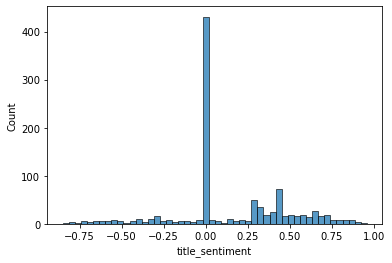

In [33]:
#We create a histogram of title sentiment , as we can see, most people who are not considered neutral on wsb express positive emotions 
sns.histplot(wsb.title_sentiment, bins = 50)
plt.savefig('./pics/title_sentimen_hist.jpg')

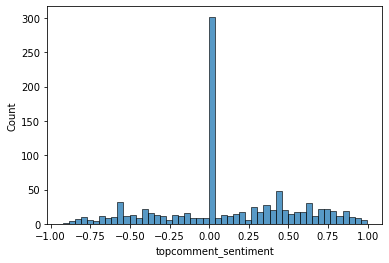

In [34]:
#histrogram of top comment sentiment shows that if its not a neutral comment, it tendds to be more positive than negative
sns.histplot(wsb.topcomment_sentiment, bins = 50)
plt.savefig('./pics/topcomment_sentiment_hist.jpg')

In [28]:
!ls


Connecting To Reddit API.ipynb negative_sentiment.jpg
Mongo with my_API.ipynb        positive_sentiment.jpg
README.md                      reddit_wsb 11.30.57 AM.csv
Sentiment Analysis.ipynb       ticker_freq.jpg
archivos.txt                   title_sentimen_hist.jpg
config                         tools
data                           topcomment_sentiment_hist.jpg
my_api.py                      wsb.csv
